In [19]:
import sys
from pathlib import Path
import os
import datetime
import pickle 
##import 
sys.path.insert(0, os.path.join(os.path.dirname(os.path.abspath("")),"Code","Travis"))
import utils
import plotting
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import config

save_path = config.save_path
data_path = config.data_path
if not save_path.exists():
    save_path.mkdir()

mice = utils.groupData(dir=data_path, analysis_file_name = "wfstack_3.pkl").mice
miceToUse = ['m722','m1323', 'm985']
color_dict = config.color_dict


c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m722\Widefield\220405
c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m722\Widefield\220801
c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m1323\Widefield\221130
c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m1323\Widefield\230331
c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m985\Widefield\220810
c:\Users\travisb\Dropbox (Personal)\Cdh23\Data\m985\Widefield\221223


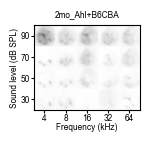

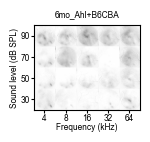

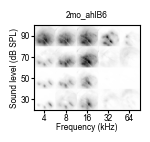

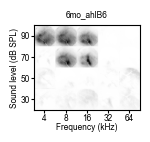

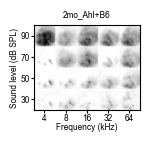

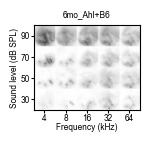

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'
ylabels = [90,70,50,30]
xlabels = [4,8,16,32,64]
miceToUse = ['m722','m1323', 'm985']
cdh23dir = data_path
tickfontsize = 6
labelfontsize = 6
for mouse in miceToUse:
    geno = mice[mice.Mouse == mouse].Genotype.values[0]
    if geno == "Thy1-GC6s; Cdh23 (Ahl/ahl)":
        panel = ["Fig6_D_", "Fig6_E_"]
        geno = "Ahl+B6"
        vmax = 0.13
    elif geno == "Thy1-GC6s; Cdh23 (ahl/ahl)":
        panel = ["Fig6_A_", "Fig6_B_"]
        geno = "ahlB6"
        vmax = 0.13
    else:
        panel = ["SF1_D_", "SF1_E_"]
        geno = "Ahl+B6CBA"
        vmax = 0.07

    datadir = mice[mice.Mouse == mouse].path.values[0]
    pathToFRA = datadir / "maps2/FRA.png"
    print(datadir)
    fig, ax = plotting.FRAimg(pathToFRA, vmax= vmax)
    plt.title("2mo_" + geno, fontsize=6)
    plt.savefig(save_path / (panel[0] + str(mouse) + "_" + geno +  "_FRA_2mo.svg"), dpi=900)

    datadir = mice[mice.Mouse == mouse].path_6mo.values[0]
    print(datadir)
    pathToFRA = datadir / "maps2/FRA.png"
    fig, ax = plotting.FRAimg(pathToFRA, vmax=vmax)
    plt.title("6mo_" + geno, fontsize=6)
    plt.savefig(save_path / (panel[1] + str(mouse) + "_" + geno + "_FRA_6mo.svg"), dpi=900)



In [21]:
##Not used in final paper
# import utils
# import matplotlib.pyplot as plt

# for mouse in miceToUse:
#     geno = mice[mice.Mouse == mouse].Genotype.values[0]
#     if geno == "Thy1-GC6s; Cdh23 (Ahl/ahl)":
#         panel = ["Fig6_D_", "Fig6_E_"]
#         geno = "Ahl+B6"
#         vmax = 0.13
#     elif geno == "Thy1-GC6s; Cdh23 (ahl/ahl)":
#         panel = ["Fig6_A_", "Fig6_B_"]
#         geno = "ahlB6"
#         vmax = 0.13
#     else:
#         panel = ["SF1_D_", "SF1_E_"]
#         geno = "Ahl+B6CBA"
#         vmax = 0.07

#     temp = mice[mice.Mouse==mouse].data.values[0].percentileResponse
#     fig, axs = plotting.plotFRAtraces(temp, ymin = -0.04, ymax=0.18)
#     fig.set_figheight(1.2)
#     fig.set_figwidth(1.2)
#     fig.supxlabel("", fontsize=6, y = -0.06)
#     fig.supylabel("Sound level (dB SPL)", fontsize=6, x=-0.06, y = 0.45)
#     # fig.set_constrained_layout(constrained=True)
#     plt.savefig(save_path/ (panel[0] + str(mouse) + "_" + geno + "_2mo_individual_response.svg"))

#     temp = mice[mice.Mouse==mouse].data_6mo.values[0].percentileResponse
#     fig, axs = plotting.plotFRAtraces(temp, ymin = -0.04, ymax=0.18)
#     fig.set_figheight(1.2)
#     fig.set_figwidth(1.2)
#     fig.supxlabel("Frequency (kHz)", fontsize=6, y = -0.06)
#     fig.supylabel("Sound level (dB SPL)", fontsize=6, x=-0.06, y = 0.45)
#     # fig.set_constrained_layout(constrained=True)
#     plt.savefig(save_path / (panel[0] + str(mouse) + "_" + geno + "_6mo_individual_response.svg"))



8 Thy1-GC6s; Cdh23 (Ahl/ahl)
8
9 Thy1-GC6s; Cdh23 (ahl/ahl)
9
5 (F1) Thy1-GC6s; Cdh23 (Ahl/ahl)
5
8
9
5


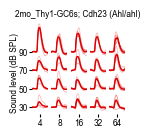

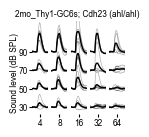

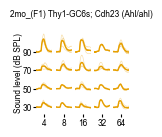

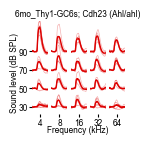

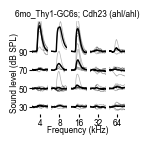

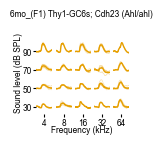

In [22]:
##6 months group data
fig_width = 1.2
fig_height = 1.2
individual_alpha = 0.3
import numpy as np
df_6mo_only = mice[mice['path_6mo']!=Path(".")]
genos = mice.Genotype.unique()
escapes = ["\\"]
data = []
data_6mo = []

geno_map = {"Thy1-GC6s; Cdh23 (Ahl/ahl)":"Ahl+B6_","Thy1-GC6s; Cdh23 (ahl/ahl)":"ahlB6_","(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)":"Ahl+B6CBA_"}
panel_map = {"Thy1-GC6s; Cdh23 (Ahl/ahl)":["Fig6_D_", "Fig6_E_"],"Thy1-GC6s; Cdh23 (ahl/ahl)":["Fig6_A_", "Fig6_B_"],"(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)":["SF1_D_", "SF1_E_"]}

for geno in genos:
    means = []
    means_6mo = []
    for i, mouse in df_6mo_only[df_6mo_only.Genotype==geno].iterrows():
        means.append(mouse.data.percentileResponse.mean(axis=3)[:,:,:,np.newaxis])
        means_6mo.append(mouse.data_6mo.percentileResponse.mean(axis=3)[:,:,:,np.newaxis])
    data.append((geno, means))
    data_6mo.append((geno,means_6mo))

for geno, response in data:
    temp = np.concatenate(response, axis=3)
    print(len(response), geno)
    fig, axs = plotting.plotFRAtraces(temp, ymin = -0.04, ymax=0.18, mean_color = color_dict[geno], mean_to_ind_alpha=individual_alpha)
    fig.set_figheight(fig_height)
    fig.set_figwidth(fig_width)
    fig.supxlabel("", fontsize=6, y = -0.06)
    fig.supylabel("Sound level (dB SPL)", fontsize=6, x=-0.06, y = 0.45)
    fig.suptitle("2mo_" + geno, fontsize=6)
    # fig.set_constrained_layout(constrained=True)
    plt.savefig(save_path / (panel_map[geno][0] + geno_map[geno] +"neq"+str(len(response)) + "_2mo_group_response.svg"))

for geno, response in data_6mo:
    temp = np.concatenate(response, axis=3)
    fig, axs = plotting.plotFRAtraces(temp, ymin = -0.04, ymax=0.18, mean_color = color_dict[geno],mean_to_ind_alpha=individual_alpha)
    fig.set_figheight(fig_height)
    fig.set_figwidth(fig_width)
    fig.supxlabel("Frequency (kHz)", fontsize=6, y = -0.06)
    fig.supylabel("Sound level (dB SPL)", fontsize=6, x=-0.06, y = 0.45)
    fig.suptitle("6mo_" + geno, fontsize=6)
    # fig.set_constrained_layout(constrained=True)
    plt.savefig(save_path / (panel_map[geno][1] + geno_map[geno] +"neq"+str(len(response)) + "_6mo_group_response.svg"))
